In [1]:
import re
import ezdxf
import pandas as pd
from pathlib import Path

In [2]:
# 👉 Change this to your folder containing DXF files
input_folder = Path("../DXF format P&IDs")

In [3]:
hex_equip_pattern = re.compile(r".*-E-.*", re.IGNORECASE)   # equipment IDs
loop_pattern = re.compile(r"^[A-Z]\d+|W\d+", re.IGNORECASE) # loop IDs like W052, F050

records = []

In [4]:
for dxf_file in input_folder.glob("*.dxf"):
    print(f"Processing {dxf_file}...")
    try:
        doc = ezdxf.readfile(dxf_file)
    except Exception as e:
        print(f"❌ Failed to read {dxf_file}: {e}")
        continue
    
    msp = doc.modelspace()
    
    for block in msp.query("INSERT"):
        tags = [att.dxf.text.strip() for att in block.attribs if att.dxf.text.strip()]
        equip_ids = [t for t in tags if hex_equip_pattern.match(t)]
        loop_ids  = [t for t in tags if loop_pattern.match(t) and not hex_equip_pattern.match(t)]
        descs     = [t for t in tags if not hex_equip_pattern.match(t) and not loop_pattern.match(t)]
        
        if equip_ids:
            records.append({
                "File": dxf_file.name,
                "Equipment ID": ", ".join(set(equip_ids)),
                "Loop/Stream ID": ", ".join(set(loop_ids)) if loop_ids else None,
                "Description": ", ".join(set(descs)) if descs else None,
                "Location": tuple(round(c,2) for c in block.dxf.insert)
            })

df = pd.DataFrame(records)

Processing ..\DXF format P&IDs\973011011C.dxf...
Processing ..\DXF format P&IDs\973011021C.dxf...
Processing ..\DXF format P&IDs\973011031C.dxf...
Processing ..\DXF format P&IDs\973011111C.dxf...
Processing ..\DXF format P&IDs\973011121C.dxf...
Processing ..\DXF format P&IDs\973011171C.dxf...
Processing ..\DXF format P&IDs\973011181C.dxf...
Processing ..\DXF format P&IDs\973011201C.dxf...
Processing ..\DXF format P&IDs\973011211C.dxf...
Processing ..\DXF format P&IDs\973011221C.dxf...
Processing ..\DXF format P&IDs\973011231C.dxf...
Processing ..\DXF format P&IDs\973011241C.dxf...
Processing ..\DXF format P&IDs\973011251C.dxf...
Processing ..\DXF format P&IDs\973011261C.dxf...
Processing ..\DXF format P&IDs\973011301C.dxf...
Processing ..\DXF format P&IDs\973011311C.dxf...
Processing ..\DXF format P&IDs\973011321C.dxf...
Processing ..\DXF format P&IDs\973011331C.dxf...
Processing ..\DXF format P&IDs\973011341C.dxf...
Processing ..\DXF format P&IDs\973011411C.dxf...
Processing ..\DXF fo

In [5]:
df.head(10)

,File,Equipment ID,Loop/Stream ID,Description,Location
0,973011021C.dxf,021-E-1,None,021,"(42.0, 468.0, 0.0)"
1,973011111C.dxf,111-E-15,P003,"WATER WASH PUMP, IN, Z, BMS, OUT, 111, HEAD, 6...","(516.0, 141.0, 0.0)"
2,973011111C.dxf,973011111-E-16,T001,"OF_LEVEL, TOPT, CONS, 973011111, DIAM, FEEDWAT...","(306.0, 234.0, 0.0)"
3,973011111C.dxf,973011111-E-17,M002,"973011111, 6B, DAERATOR, 111","(417.0, 294.0, 0.0)"
4,973011111C.dxf,973011111-E-18,P003-M01,"WATER WASH PUMP, 973011111, 111, 6B","(474.0, 138.0, 0.0)"
5,973011121C.dxf,021-E-12,W006,"121, 6B, DESUPERHEATER, 021","(248.48, 474.38, 0.0)"
6,973011121C.dxf,973011121A-E-18,None,"973011121A, FW VALVE TURBINE PUMP, 6B-HV-1205","(383.36, 129.44, 0.0)"
7,973011121C.dxf,973011121A-E-19,None,"973011121A, FW VALVE TURBINE PUMP, 6B-HV-1205-...","(315.0, 90.0, 0.0)"
8,973011121C.dxf,973011121A-E-20,None,"973011121A, 6B-HV-1215","(393.0, 159.0, 0.0)"
9,973011121C.dxf,973011121A-E-21,None,"6B-HV-1215-M01, 973011121A, 121, 6B, FW VALVE ...","(380.34, 163.72, 0.0)"


In [6]:
df.to_csv("recovery_boiler_hex_extraction.csv", index=False)
print("✅ Extraction complete. Results saved to recovery_boiler_hex_extraction.csv")

✅ Extraction complete. Results saved to recovery_boiler_hex_extraction.csv


In [7]:
import networkx as nx
import matplotlib.pyplot as plt

In [8]:
G = nx.Graph()

# Example loop dictionary
loops = {
   "W052": ["311-E-431.01.01", "311-E-27"],
   "W057": ["311-E-27"],
   "F050": ["973011301-E-28"],
   "F055": ["973011301-E-29"]
}

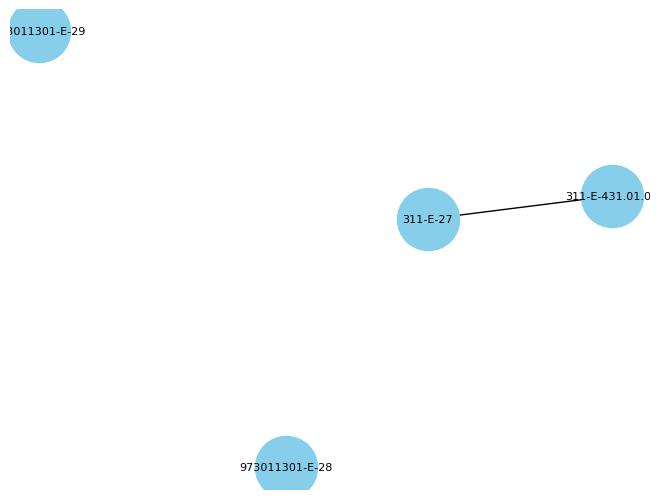

In [9]:
for loop, hexs in loops.items():
    for i in range(len(hexs)):
        G.add_node(hexs[i], loop=loop)
        if i > 0:
            G.add_edge(hexs[i-1], hexs[i], loop=loop)

nx.draw(G, with_labels=True, node_color="skyblue", font_size=8, node_size=2000)
plt.show()